# Import Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load Data


In [2]:
def load_data():
    df = pd.read_csv('data/Housing.csv')
    return df

In [3]:
df = load_data()

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# Data type info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
# Statistical Info
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Preprocessing


In [7]:
# Check for null values
df.isnull().sum()
## From this we can see there are no null values in the dataset, so no actions needed to taken. 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

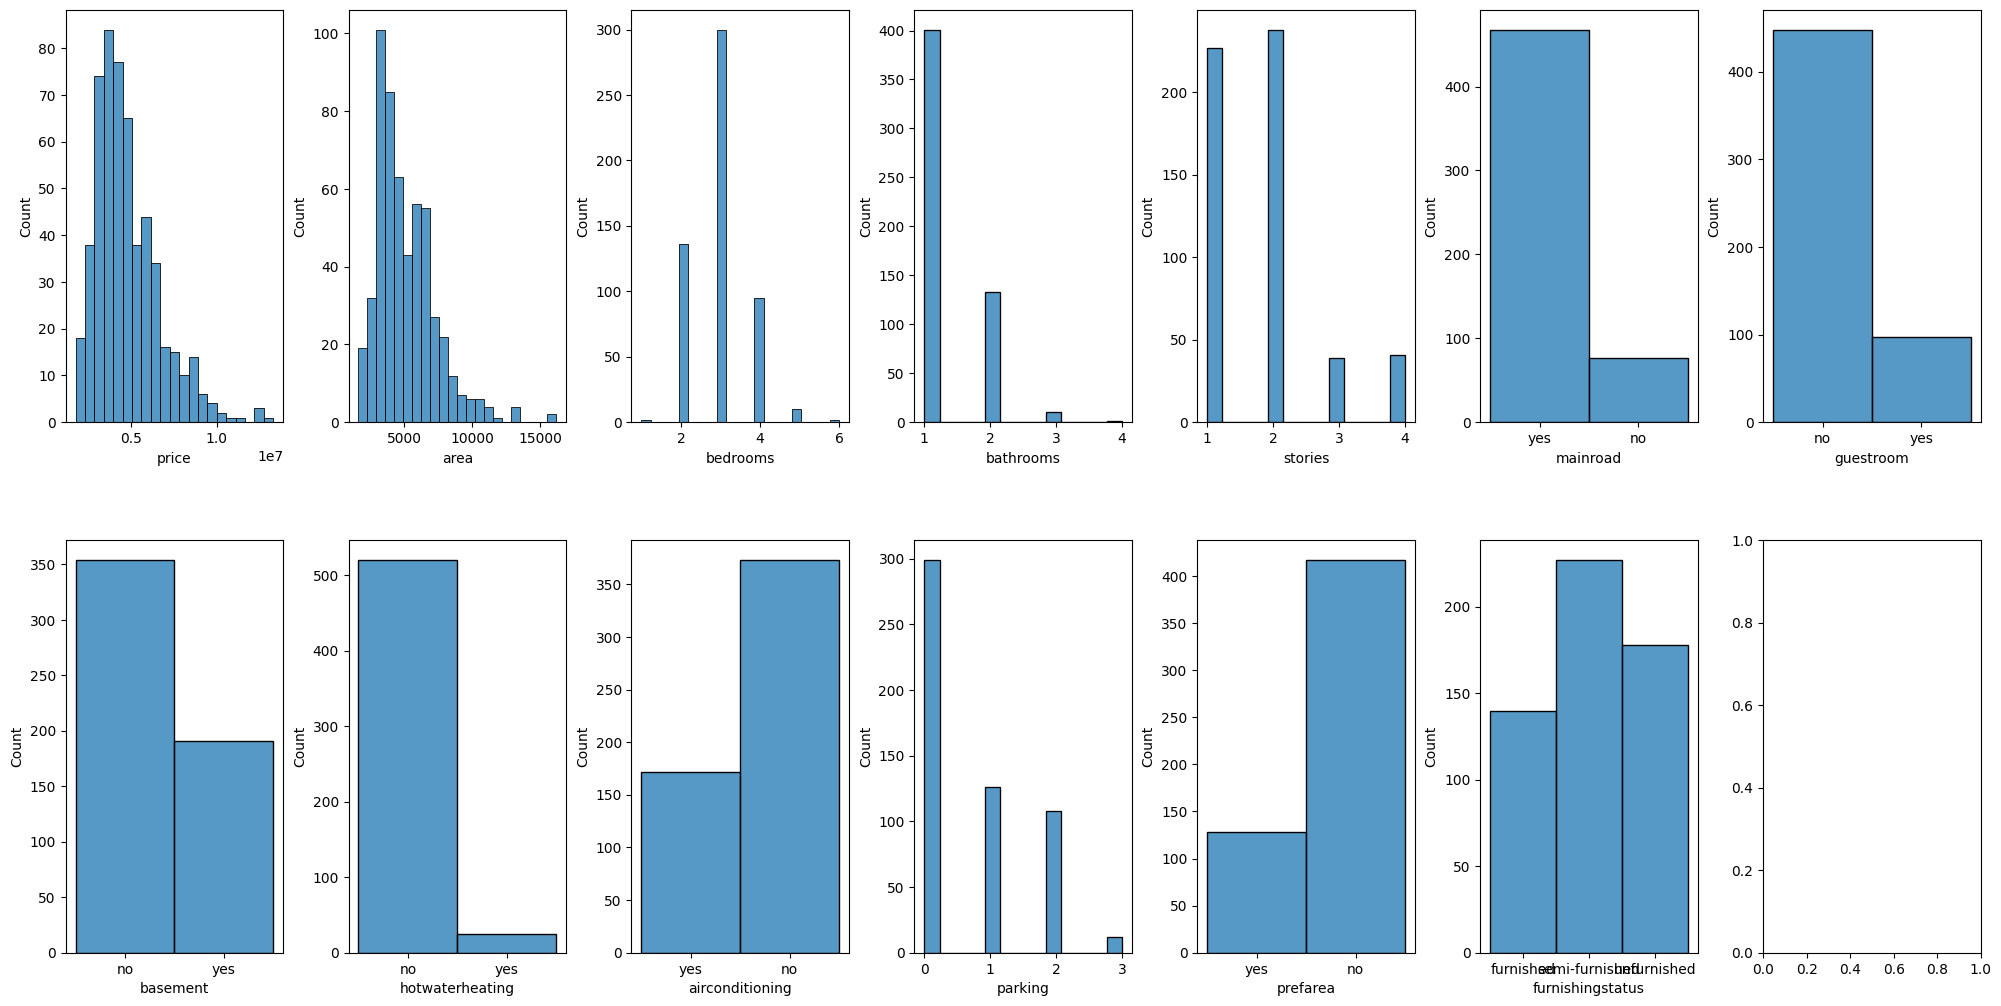

In [8]:
# create hist plot
figure, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(data=value, ax=ax[index] )
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

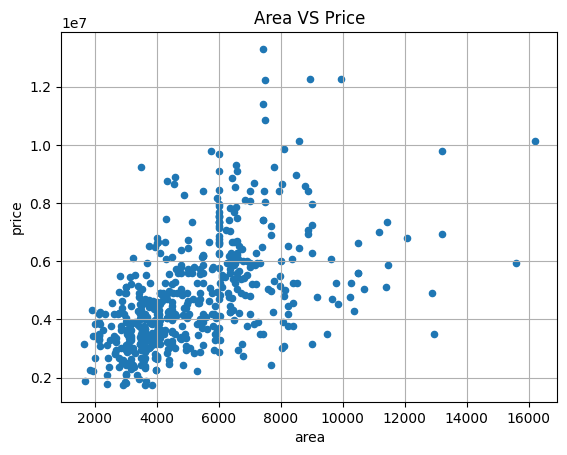

In [9]:
df.plot(kind='scatter', x='area', y='price', grid=True)
plt.title("Area VS Price")
plt.show()

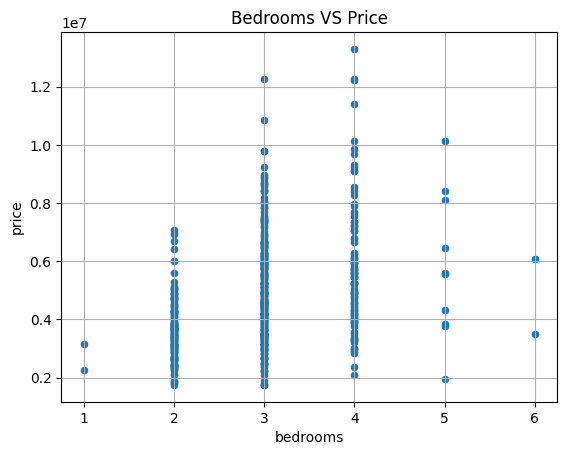

In [10]:
df.plot(kind='scatter', x='bedrooms', y='price', grid=True)
plt.title("Bedrooms VS Price")
plt.show()

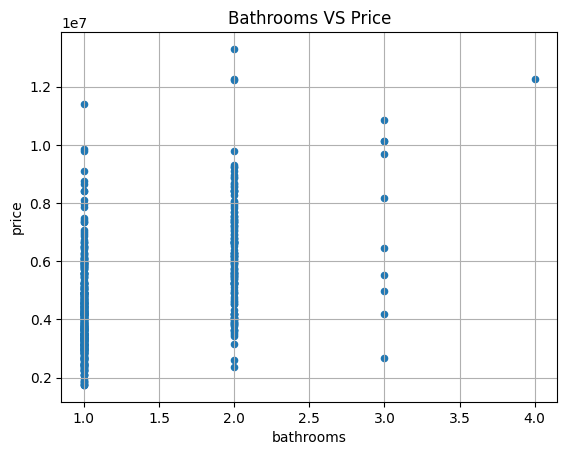

In [11]:
df.plot(kind='scatter', x='bathrooms', y='price', grid=True)
plt.title("Bathrooms VS Price")
plt.show()

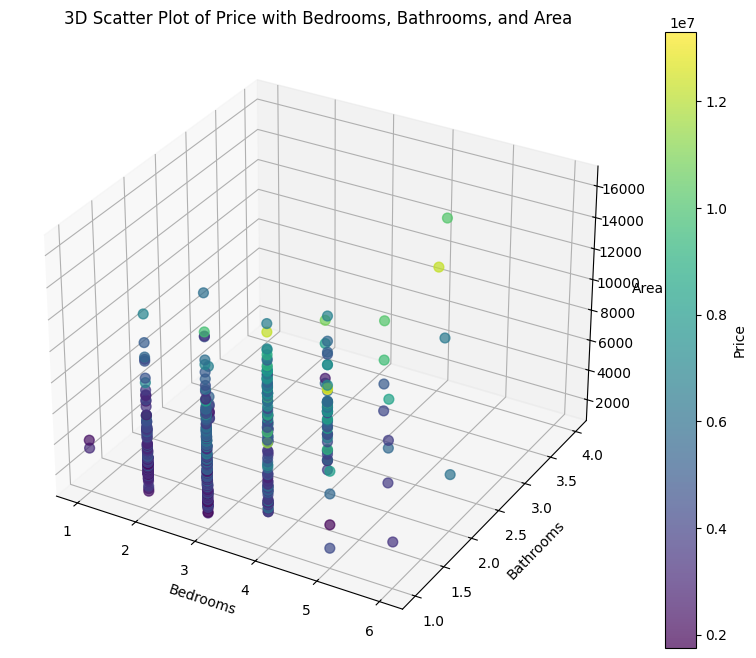

In [12]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['bedrooms'], df['bathrooms'], df['area'], c=df['price'], cmap='viridis', s=50, alpha=0.7)

# Customize the plot
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Area')
ax.set_title('3D Scatter Plot of Price with Bedrooms, Bathrooms, and Area')
fig.colorbar(scatter, label='Price')

# Show the plot
plt.show()

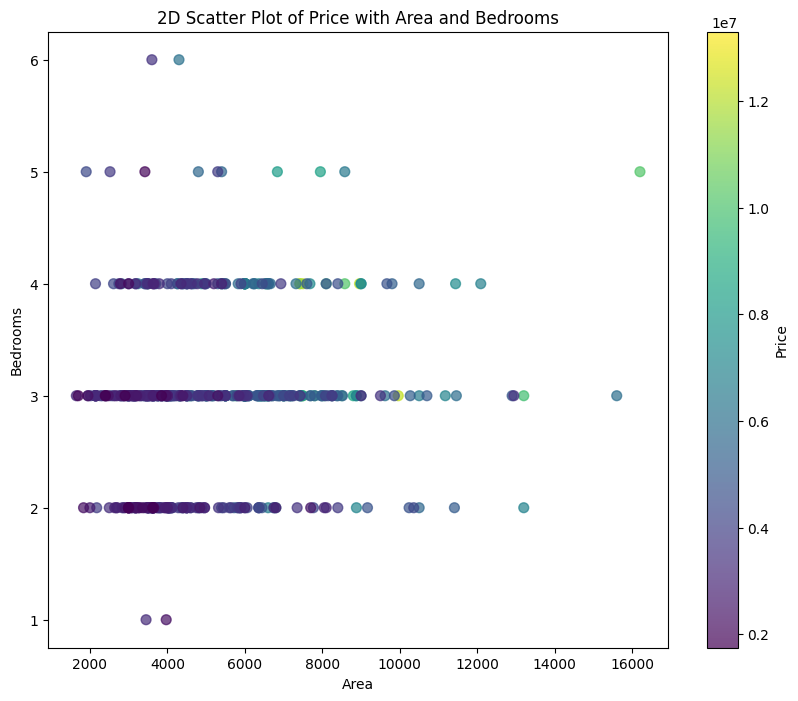

In [13]:
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(df['area'], df['bedrooms'], c=df['price'], cmap='viridis', s=50, alpha=0.7)

# Customize the plot
plt.xlabel('Area')
plt.ylabel('Bedrooms')
plt.title('2D Scatter Plot of Price with Area and Bedrooms')
plt.colorbar(label='Price')

# Show the plot
plt.show()

In [14]:
# Converting yes and no to 1 and 0
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in cols:
    for index, val in enumerate(df[col]):
        if val == 'yes':
            df.at[index, col] = 1
        else:
            df.at[index, col] = 0
# Visualize updated data 
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


### One hot encoding furnishing status


In [15]:
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnishing', dtype=int)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


### Feature Scaling


In [16]:
# Feature scaling the area 
scaler = MinMaxScaler(feature_range=(4, 8))

df['area'] = scaler.fit_transform(df['area'].values.reshape(-1, 1))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
0,13300000,5.586254,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,6.009622,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,6.284536,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,5.608247,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,5.586254,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,4.371134,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,4.206186,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,4.541581,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,4.346392,3,1,1,0,0,0,0,0,0,0,1,0,0


In [17]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


<Axes: >

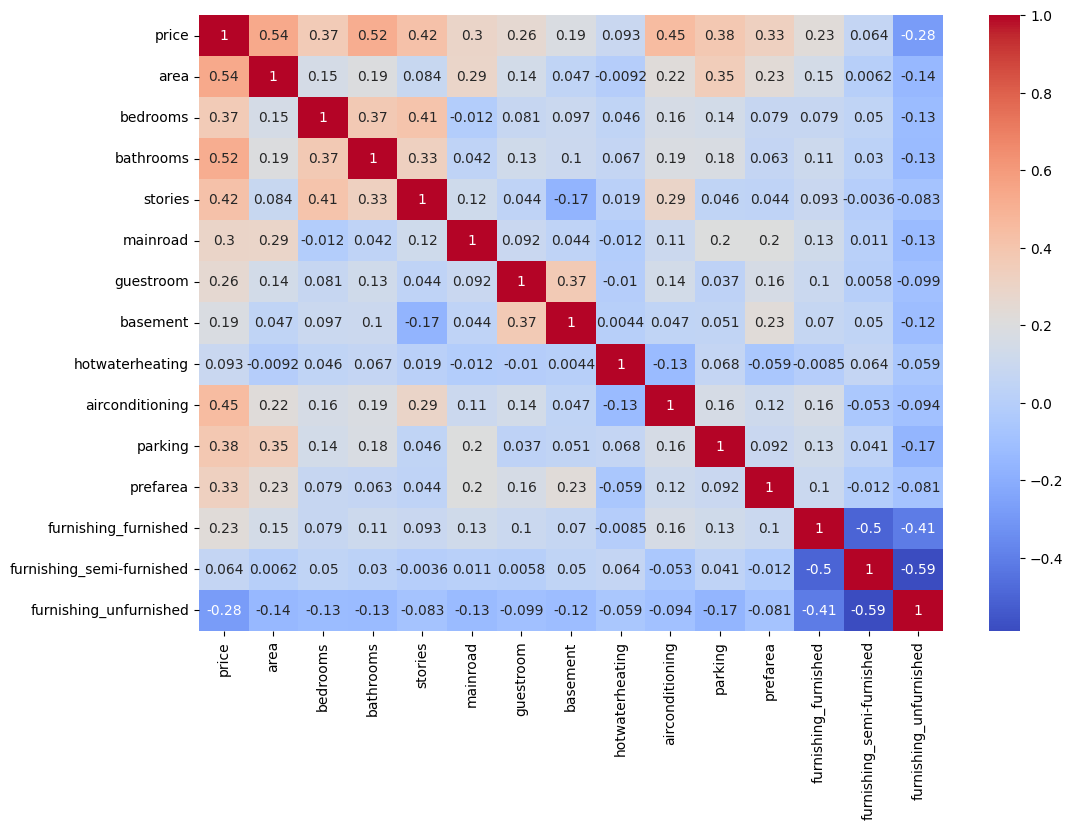

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Splitting the data set to training and test set


In [19]:
X = df.drop(['price'], axis=1)
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)

(381, 14)
(381,)


In [22]:
print(X_test.shape)
print(y_test.shape)

(164, 14)
(164,)


# Linear Regresstion Model


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Test


In [24]:
y_pred = model.predict(X_test)

In [25]:
r2score = r2_score(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"r2 score = {r2score}")
print(f"mean square error = {mse}")
print(f"root mean square error = {rmse}")

r2 score = 0.4053197071034329
mean square error = 1523019469501.2908
root mean square error = 1234106.7496376846


### Predict the price of any particular house from test set


In [26]:
def predict_price(house_index):
    test_len = len(y_test)
    if(house_index > test_len):
        print("Index out of bound.")
        return
    # Extract the features for the specified house index from the test set
    features = X_test.iloc[house_index].values.reshape(1, -1)
    # Make a prediction using the trained model
    pred_price = model.predict(features)
    # Extract the real price for the specified house index from the test set
    real_price = y_test.iloc[house_index]

    print(f"Predicted Price: ${pred_price[0]:.2f}")
    print(f"Real Price: ${real_price:.2f}")

In [29]:
# Predict the price for the house at index 0
predict_price(45)

Predicted Price: $4286017.77
Real Price: $4480000.00


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
